## Analysis

### Libraries

In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



In [3]:
df = pd.read_pickle("final_reviews_with_features.pkl")

### Length Distribution

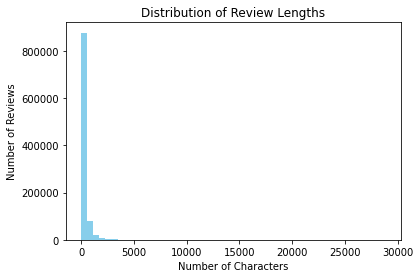

In [14]:
df["review_length"] = df["text"].apply(len)
plt.hist(df["review_length"], bins=50, color="skyblue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Reviews")
plt.show()

In [15]:
# Check for empty or NaN reviews
empty_reviews = df["text"].isnull().sum()
empty_strings = (df["text"].str.strip() == "").sum()
print(f"Number of NaN reviews: {empty_reviews}")
print(f"Number of empty string reviews: {empty_strings}")

# Optionally, show a few empty or NaN rows
print(df[df["text"].isnull() | (df["text"].str.strip() == "")].head())

Number of NaN reviews: 0
Number of empty string reviews: 878
      rating                title text  \
1820     5.0             It works        
2838     5.0  TiMOVO Check it Out        
3556     4.0                    😀        
3557     5.0             10 of 10        
3558     3.0                    🙂        

                                                 images        asin  \
1820  [{'attachment_type': 'IMAGE', 'large_image_url...  B00BWF5U0M   
2838  [{'attachment_type': 'IMAGE', 'large_image_url...  B093F9CGPP   
3556                                                 []  B07XXWZKBT   
3557                                                 []  B09G9FPHY6   
3558                                                 []  B09VBWBHBC   

     parent_asin                       user_id      timestamp  helpful_vote  \
1820  B00BWF5U0M  AHN4W5UPINW54AZAYFQS4XZTWYDQ  1637092610422             0   
2838  B09D2LC6WF  AHQ5LUB5SXGXMH3AQEYW67LDSL2A  1628957326773             0   
3556  B07XXWZKBT  AHBZ

In [17]:
print(df["review_length"].describe())
print(df.sort_values("review_length").head(10)[["text", "review_length"]])

count    1000000.000000
mean         285.122614
std          492.693106
min            0.000000
25%           52.000000
50%          137.000000
75%          320.000000
max        28834.000000
Name: review_length, dtype: float64
       text  review_length
302447                   0
512043                   0
108306                   0
74861                    0
74862                    0
357819                   0
357818                   0
357817                   0
326462                   0
357816                   0


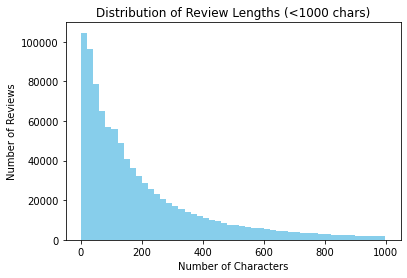

In [22]:
plt.hist(df[df["review_length"] < 1000]["review_length"], bins=50, color="skyblue")
plt.title("Distribution of Review Lengths (<1000 chars)")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Reviews")
plt.show()

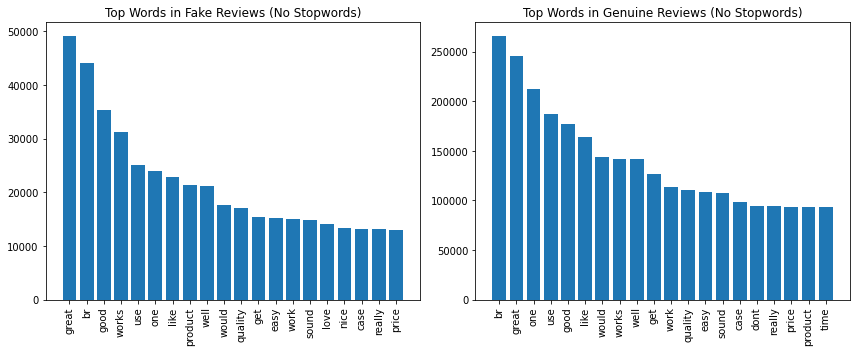

In [ ]:
# Plot the distribution of review lengths by heuristic label
# Remove stopwords from review text for clearer word frequency analysis
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "can", "will", "just", "don", "should", "now"
])

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stopwords])

# Apply to fake and genuine reviews before word frequency analysis
fake_text = " ".join(df[df["heuristic_label"] == 1]["text"].apply(remove_stopwords))
genuine_text = " ".join(df[df["heuristic_label"] == 0]["text"].apply(remove_stopwords))

from collections import Counter
fake_common = Counter(fake_text.split()).most_common(20)
genuine_common = Counter(genuine_text.split()).most_common(20)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(*zip(*fake_common))
plt.title("Top Words in Fake Reviews (No Stopwords)")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(*zip(*genuine_common))
plt.title("Top Words in Genuine Reviews (No Stopwords)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Sentiment Analysis by Rating

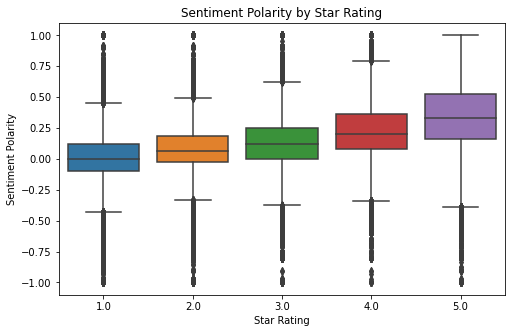

In [7]:
if "rating" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="rating", y="sentiment_polarity", data=df)
    plt.title("Sentiment Polarity by Star Rating")
    plt.xlabel("Star Rating")
    plt.ylabel("Sentiment Polarity")
    plt.show()

### Top Words in Fake and Real Reviews

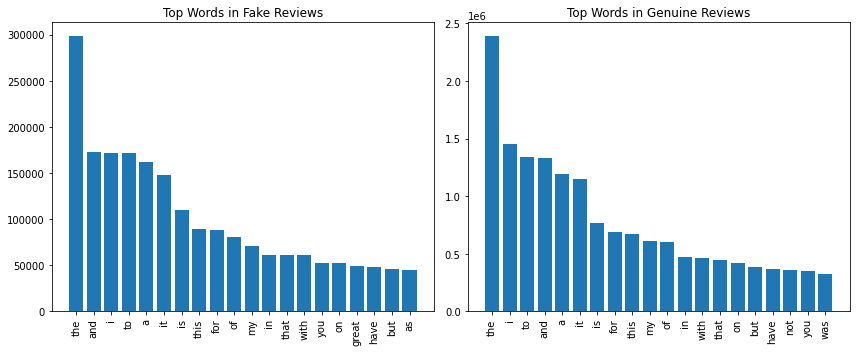

In [9]:
fake_words = " ".join(df[df["heuristic_label"] == 1]["text"]).split()
genuine_words = " ".join(df[df["heuristic_label"] == 0]["text"]).split()

fake_common = Counter(fake_words).most_common(20)
genuine_common = Counter(genuine_words).most_common(20)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(*zip(*fake_common))
plt.title("Top Words in Fake Reviews")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(*zip(*genuine_common))
plt.title("Top Words in Genuine Reviews")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Helpful Votes Distribution

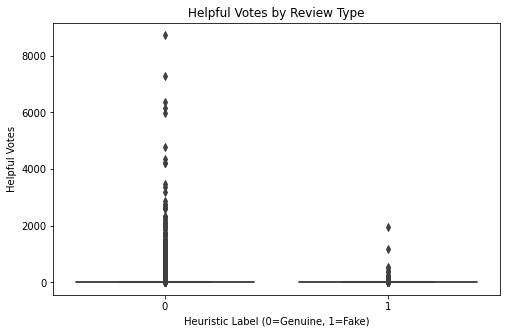

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="heuristic_label", y="helpful_vote", data=df)
plt.title("Helpful Votes by Review Type")
plt.xlabel("Heuristic Label (0=Genuine, 1=Fake)")
plt.ylabel("Helpful Votes")
plt.show()

### Verified Purchase Rate

In [11]:
verified_counts = df.groupby("heuristic_label")["verified_purchase"].mean()
print("Verified Purchase Rate:\n", verified_counts)

Verified Purchase Rate:
 heuristic_label
0    0.961038
1    0.620182
Name: verified_purchase, dtype: float64


### Duplicated Review Analysis

In [12]:
duplicate_users = df[df["duplicated_review"] == True]["user_id"].nunique()
duplicate_products = df[df["duplicated_review"] == True]["asin"].nunique()
print(f"Users with duplicate reviews: {duplicate_users}")
print(f"Products with duplicate reviews: {duplicate_products}")

Users with duplicate reviews: 40025
Products with duplicate reviews: 58146


### Top Reviews Product

Top 10 Products by Number of Reviews:
B01G8JO5F2    5200
B00ZV9RDKK    3503
B079QHML21    2526
B00TYFCJ8S    2316
B01DFKC2SO    2226
B014YN7LVE    2221
B00R92CL5E    2106
B07V42JLFH    2036
B0047T79VS    1782
B00L0YLRUW    1604
Name: asin, dtype: int64


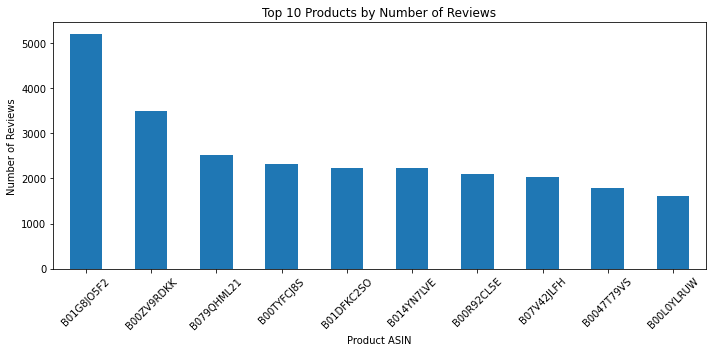

In [23]:
# Show top 10 products by number of reviews
top_products = df["asin"].value_counts().head(10)
print("Top 10 Products by Number of Reviews:")
print(top_products)

# Optionally, display product IDs and their review counts as a bar plot
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Number of Reviews")
plt.xlabel("Product ASIN")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()